# TWEET STANCE CLASSIFIER
### (Model Evaluator)

In [2]:
from utils.evaluator import StanceClassifierEvaluator
from models.custom_stance_classifier import CustomStanceClassifier
from models.transfomer_stance_classifier import StanceClassifier
from sklearn.metrics import f1_score
import numpy as np
import pandas as pd
import torch

/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <0B7EB158-53DC-3403-8A49-22178CAB4612> /opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/image.so
  Reason: tried: '/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebrew/anaconda3/envs/tensorflow/lib/python3.10/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/homebre

## Load Test Data

In [3]:
test_dir = 'data/StanceDataset/test.csv'

In [4]:
from charset_normalizer import detect
# Detect the encoding
with open(test_dir, "rb") as f:
    detected_encoding = detect(f.read())["encoding"]

In [5]:
test_df = pd.read_csv(test_dir, encoding=detected_encoding, engine='python', on_bad_lines='skip')
processed_test_df = pd.read_csv('data/processed_test.csv')

In [6]:
stance_map = {'FAVOR': 0, 'AGAINST': 1, 'NONE': 2}
test_df['Stance_Numeric'] = test_df['Stance'].map(stance_map)
processed_test_df['Stance_Numeric'] = processed_test_df['Stance'].map(stance_map)

In [7]:
y_test = test_df['Stance_Numeric']

In [8]:
y_target = test_df["Target"]

In [9]:
test_inputs = test_df['Tweet'] + " [SEP] " + test_df['Target']
processed_test_inputs = processed_test_df['Tweet'] + " [SEP] " + processed_test_df['Target']

In [10]:
test_inputs = list(test_inputs)
processed_test_inputs = list(processed_test_inputs)

## Evaluator

In [11]:
evaluator = StanceClassifierEvaluator(class_labels=['FAVOR', 'AGAINST', 'NONE'])

## Stance classifier

### ROBERTA

In [12]:
roberta_clf = StanceClassifier.load_model('stance_model/roberta-base')

In [13]:
y_preds = pd.DataFrame(roberta_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.6044

Per-class F1 Scores:
FAVOR: 0.4970
AGAINST: 0.6718
NONE: 0.5641

Per-target F1 Scores:
Class Atheism: 0.5981
Class Climate Change is a Real Concern: 0.6169
Class Donald Trump: 0.3663
Class Feminist Movement: 0.5825
Class Hillary Clinton: 0.5105
Class Legalization of Abortion: 0.5902

Detailed Classification Report:

FAVOR:
  Precision: 0.5464
  Recall: 0.4558
  F1-score: 0.4970
  Support: 452.0

AGAINST:
  Precision: 0.6963
  Recall: 0.6489
  F1-score: 0.6718
  Support: 1014.0

NONE:
  Precision: 0.5000
  Recall: 0.6469
  F1-score: 0.5641
  Support: 490.0

macro avg:
  Precision: 0.5809
  Recall: 0.5839
  F1-score: 0.5776
  Support: 1956.0

weighted avg:
  Precision: 0.6125
  Recall: 0.6038
  F1-score: 0.6044
  Support: 1956.0


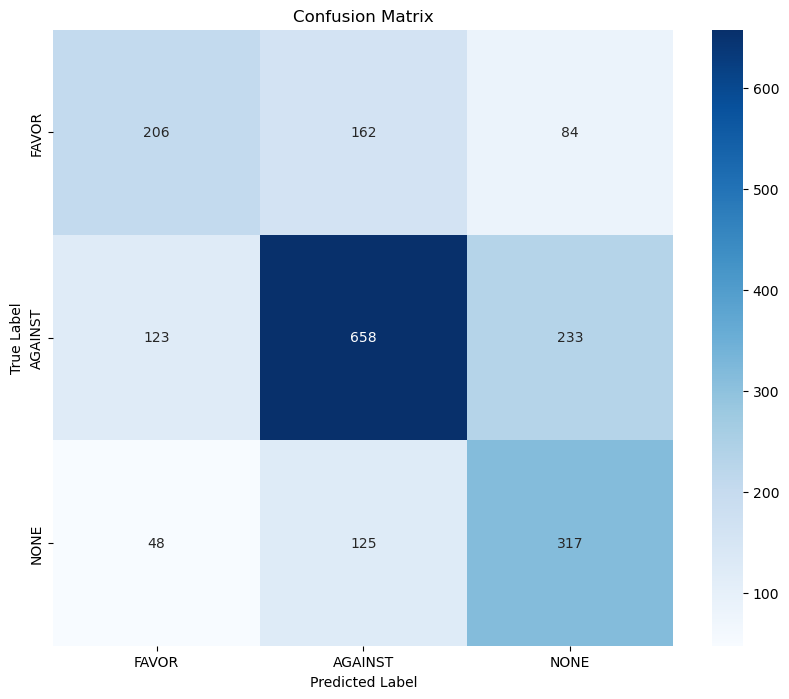

In [14]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### BERTWEET

In [15]:
bertweet_clf = StanceClassifier.load_model('stance_model/vinai/bertweet-base')

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [16]:
y_preds = pd.DataFrame(bertweet_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.6131

Per-class F1 Scores:
FAVOR: 0.5391
AGAINST: 0.6581
NONE: 0.5882

Per-target F1 Scores:
Class Atheism: 0.6111
Class Climate Change is a Real Concern: 0.5712
Class Donald Trump: 0.3462
Class Feminist Movement: 0.5820
Class Hillary Clinton: 0.6945
Class Legalization of Abortion: 0.6167

Detailed Classification Report:

FAVOR:
  Precision: 0.5910
  Recall: 0.4956
  F1-score: 0.5391
  Support: 452.0

AGAINST:
  Precision: 0.7248
  Recall: 0.6026
  F1-score: 0.6581
  Support: 1014.0

NONE:
  Precision: 0.4905
  Recall: 0.7347
  F1-score: 0.5882
  Support: 490.0

macro avg:
  Precision: 0.6021
  Recall: 0.6109
  F1-score: 0.5951
  Support: 1956.0

weighted avg:
  Precision: 0.6352
  Recall: 0.6109
  F1-score: 0.6131
  Support: 1956.0


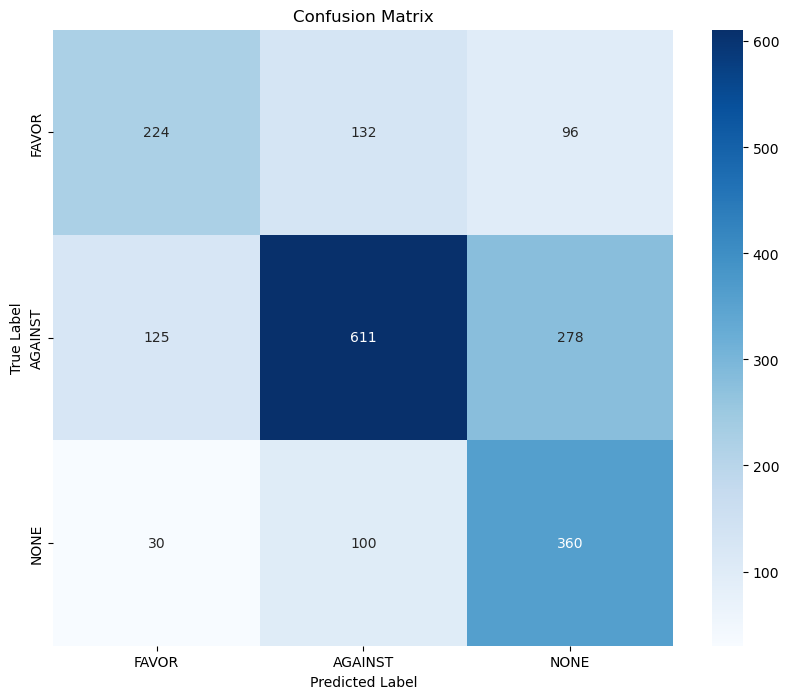

In [17]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### BERT

In [18]:
bert_clf = StanceClassifier.load_model('stance_model/bert-base-uncased')

In [19]:
y_preds = pd.DataFrame(bert_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5825

Per-class F1 Scores:
FAVOR: 0.5086
AGAINST: 0.6333
NONE: 0.5455

Per-target F1 Scores:
Class Atheism: 0.6204
Class Climate Change is a Real Concern: 0.5770
Class Donald Trump: 0.2812
Class Feminist Movement: 0.5403
Class Hillary Clinton: 0.6374
Class Legalization of Abortion: 0.5525

Detailed Classification Report:

FAVOR:
  Precision: 0.5718
  Recall: 0.4580
  F1-score: 0.5086
  Support: 452.0

AGAINST:
  Precision: 0.7369
  Recall: 0.5552
  F1-score: 0.6333
  Support: 1014.0

NONE:
  Precision: 0.4337
  Recall: 0.7347
  F1-score: 0.5455
  Support: 490.0

macro avg:
  Precision: 0.5808
  Recall: 0.5826
  F1-score: 0.5624
  Support: 1956.0

weighted avg:
  Precision: 0.6228
  Recall: 0.5777
  F1-score: 0.5825
  Support: 1956.0


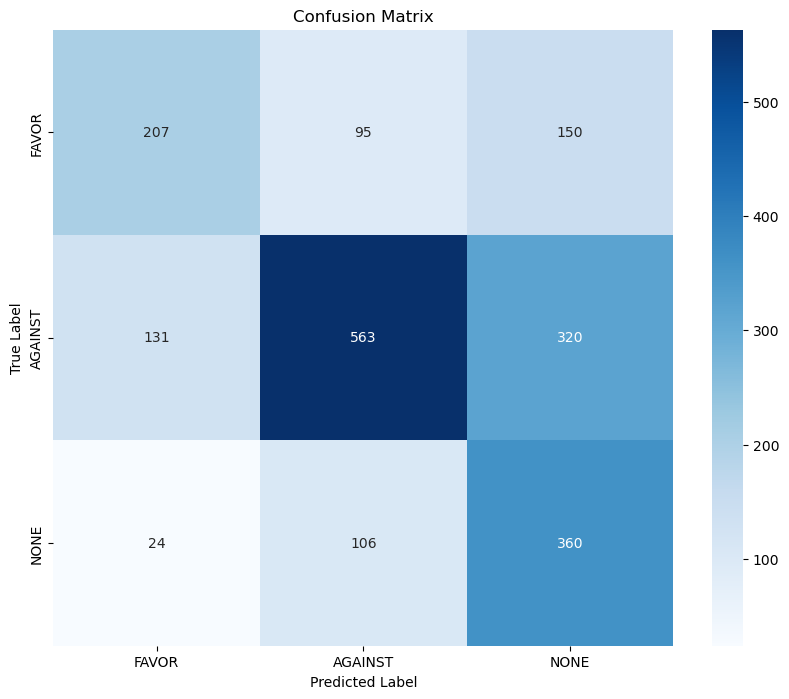

In [20]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### DISTILBERT

In [21]:
distilbert_clf = StanceClassifier.load_model('stance_model/distilbert-base-cased')

In [22]:
y_preds = pd.DataFrame(distilbert_clf.predict(test_df.Tweet, y_target)).label.str.split("_").str[1].astype(int)

Device set to use mps:0


=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5766

Per-class F1 Scores:
FAVOR: 0.4801
AGAINST: 0.6513
NONE: 0.5113

Per-target F1 Scores:
Class Atheism: 0.5388
Class Climate Change is a Real Concern: 0.5057
Class Donald Trump: 0.3425
Class Feminist Movement: 0.5542
Class Hillary Clinton: 0.5935
Class Legalization of Abortion: 0.5660

Detailed Classification Report:

FAVOR:
  Precision: 0.5100
  Recall: 0.4535
  F1-score: 0.4801
  Support: 452.0

AGAINST:
  Precision: 0.6795
  Recall: 0.6252
  F1-score: 0.6513
  Support: 1014.0

NONE:
  Precision: 0.4573
  Recall: 0.5796
  F1-score: 0.5113
  Support: 490.0

macro avg:
  Precision: 0.5489
  Recall: 0.5528
  F1-score: 0.5475
  Support: 1956.0

weighted avg:
  Precision: 0.5847
  Recall: 0.5741
  F1-score: 0.5766
  Support: 1956.0


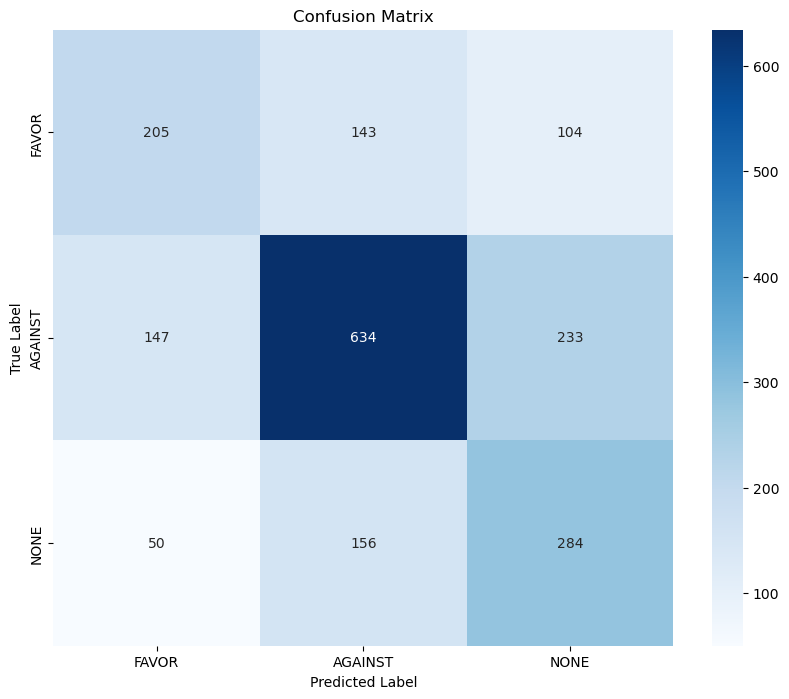

In [23]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

## Custom classifier

### BERTWEET

In [24]:
bertweet_clf = CustomStanceClassifier.load_model('models/vinai/bertweet-base.pt', device="mps")

/Users/nguyennguyen/Documents/rmit/Deep Learning/Assignment02/tweet-stance-classification/models/custom_stance_classifier.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

In [25]:
bertweet_processed_test_inputs = bertweet_clf.tokenizer(processed_test_inputs,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

In [26]:
# Move tensors to device
input_ids = bertweet_processed_test_inputs['input_ids']
attention_mask = bertweet_processed_test_inputs['attention_mask']
        
# Get prediction
with torch.no_grad():
    outputs = bertweet_clf(input_ids, attention_mask)

In [27]:
y_preds = torch.argmax(outputs, dim=1).cpu().numpy()

=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5762

Per-class F1 Scores:
FAVOR: 0.5145
AGAINST: 0.6316
NONE: 0.5182

Per-target F1 Scores:
Class Atheism: 0.6779
Class Climate Change is a Real Concern: 0.5011
Class Donald Trump: 0.4070
Class Feminist Movement: 0.5123
Class Hillary Clinton: 0.5181
Class Legalization of Abortion: 0.5611

Detailed Classification Report:

FAVOR:
  Precision: 0.5010
  Recall: 0.5288
  F1-score: 0.5145
  Support: 452.0

AGAINST:
  Precision: 0.6613
  Recall: 0.6045
  F1-score: 0.6316
  Support: 1014.0

NONE:
  Precision: 0.4891
  Recall: 0.5510
  F1-score: 0.5182
  Support: 490.0

macro avg:
  Precision: 0.5505
  Recall: 0.5614
  F1-score: 0.5548
  Support: 1956.0

weighted avg:
  Precision: 0.5811
  Recall: 0.5736
  F1-score: 0.5762
  Support: 1956.0


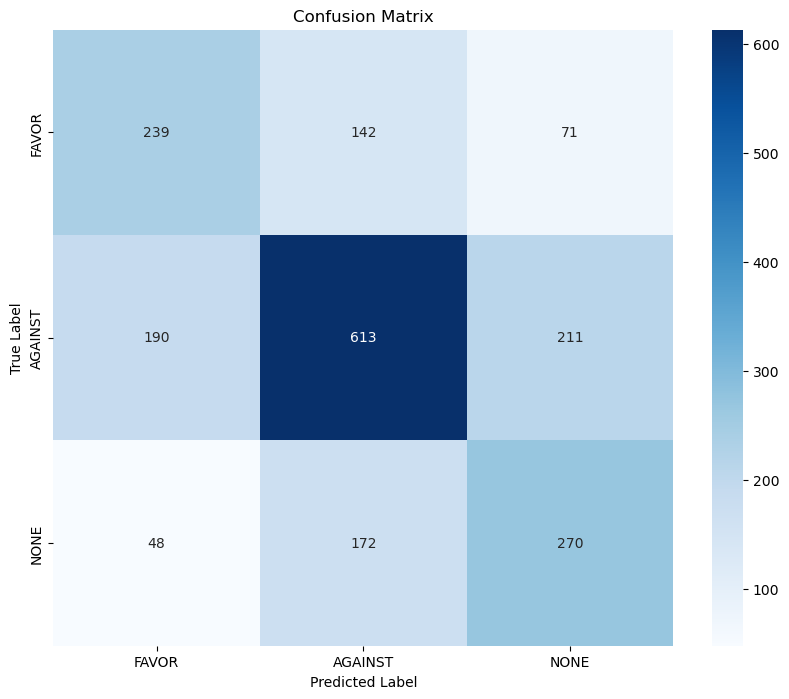

In [28]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])

### DISTILBERT

In [29]:
distilbert_clf = CustomStanceClassifier.load_model('models/distilbert/distilbert-base-uncased.pt', device="mps")

/Users/nguyennguyen/Documents/rmit/Deep Learning/Assignment02/tweet-stance-classification/models/custom_stance_classifier.py:171: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.

In [30]:
distilbert_processed_test_inputs = distilbert_clf.tokenizer(processed_test_inputs,
            add_special_tokens=True,
            max_length=128,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

In [31]:
# Move tensors to device
input_ids = distilbert_processed_test_inputs['input_ids']
attention_mask = distilbert_processed_test_inputs['attention_mask']
        
# Get prediction
with torch.no_grad():
    outputs = distilbert_clf(input_ids, attention_mask)

In [32]:
y_preds = torch.argmax(outputs, dim=1).cpu().numpy()

=== Stance Classifier Evaluation Results ===

Overall F1 Score: 0.5624

Per-class F1 Scores:
FAVOR: 0.4803
AGAINST: 0.6273
NONE: 0.5036

Per-target F1 Scores:
Class Atheism: 0.6211
Class Climate Change is a Real Concern: 0.4874
Class Donald Trump: 0.2968
Class Feminist Movement: 0.4948
Class Hillary Clinton: 0.4720
Class Legalization of Abortion: 0.5564

Detailed Classification Report:

FAVOR:
  Precision: 0.5417
  Recall: 0.4314
  F1-score: 0.4803
  Support: 452.0

AGAINST:
  Precision: 0.6874
  Recall: 0.5769
  F1-score: 0.6273
  Support: 1014.0

NONE:
  Precision: 0.4174
  Recall: 0.6347
  F1-score: 0.5036
  Support: 490.0

macro avg:
  Precision: 0.5488
  Recall: 0.5477
  F1-score: 0.5371
  Support: 1956.0

weighted avg:
  Precision: 0.5861
  Recall: 0.5578
  F1-score: 0.5624
  Support: 1956.0


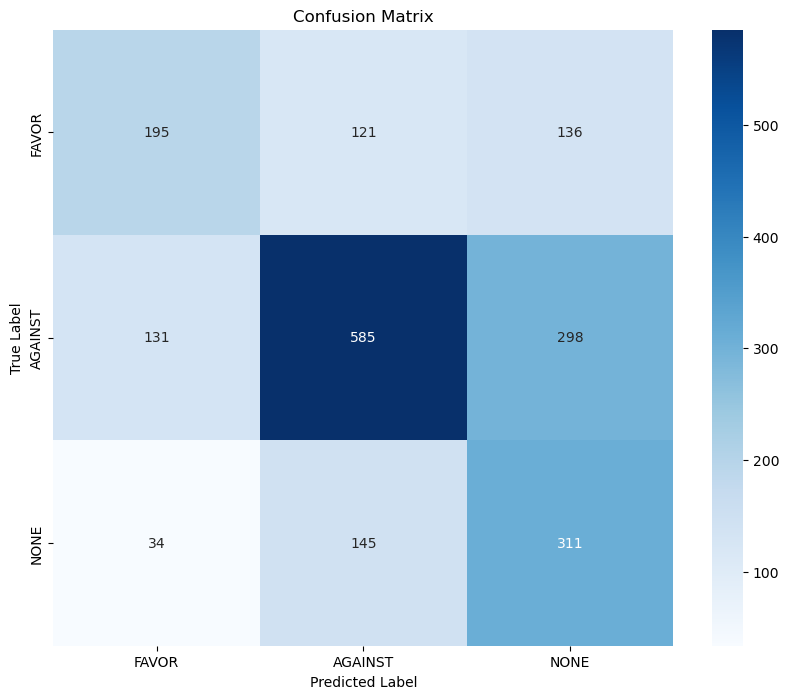

In [33]:
# Get all evaluation metrics
metrics = evaluator.evaluate(y_test, y_preds, y_target)

# Print detailed metrics
evaluator.print_metrics(metrics)

# Plot confusion matrix
evaluator.plot_confusion_matrix(metrics['confusion_matrix'])